In [1]:
%config ZMQInteractiveShell.ast_node_interactivity="all"

# 预处理

## 无量纲化

·中心化：本质是让所有记录减去一个固定值，即让数据样本数据平移到 某个位置。

·缩放：本质是通过除以一个固定值，将数据固定在某个范围之中，取对数也算是一种缩放处理。


In [2]:
#归一化 MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

data = [[-1,2],[-0.5,6],[0,10],[1,18]]

import pandas as pd
df = pd.DataFrame(data)
df

scaler = MinMaxScaler()
# scaler = scaler.fit(data)
# scaler
# result = scaler.transform(data)
# result
.scaler.fit_transform(data)

scaler.inverse_transform(result)#逆转归一化进程

sc = MinMaxScaler(feature_range=[5,10])
sc
re = sc.fit_transform(data)
re

#当X中的特征数量非常多的时候，fit会报错并表示，数据量太大了我计算不了 
#此时使用partial_fit作为训练接口 
#scaler = scaler.partial_fit(data)


SyntaxError: invalid syntax (<ipython-input-2-65443f6ee90d>, line 15)

In [ ]:
#标准化 StandardScaler

from sklearn.preprocessing import StandardScaler
data = [[-1,2],[-0.5,6],[0,10],[1,18]]
sc = StandardScaler()
sc.fit(data)
sc.mean_
sc.var_

X_std = sc.transform(data)
X_std

X_std.mean()
X_std.var()

sc.inverse_transform(X_std)

## 缺失值

In [ ]:
class sklearn.impute.SimpleImputer (missing_values=nan, 
                                    strategy=’mean’, 
                                    ﬁll_value=None, 
                                    verbose=0, 
                                    copy=True)


In [ ]:
import pandas as pd
data = pd.read_csv('Narrativedata.csv',index_col=0)
data.head()

In [ ]:
from sklearn.impute import SimpleImputer
#data.info()

age = data.loc[:,"Age"].values.reshape(-1,1)
#age
imp_mean = SimpleImputer()
imp_median = SimpleImputer(strategy='median')
imp_0 = SimpleImputer(strategy='constant',fill_value=0)

imp_mean = imp_mean.fit_transform(age)
imp_0 = imp_0.fit_transform(age)
imp_median = imp_median.fit_transform(age)

imp_mean[:20] 
imp_median[:20] 
imp_0[:20]

data.loc[:,'Age'] = imp_median

#data.info()

In [ ]:
Embarked = data.loc[:,"Embarked"].values.reshape(-1,1) 
imp_mode = SimpleImputer(strategy='most_frequent')
data.loc[:,"Embarked"] = imp_mode.fit_transform(Embarked)

data.info()

In [ ]:
#使用pandas和numpy填补
data = pd.read_csv('Narrativedata.csv',index_col=0)

data.info()
data.loc[:,'Age'] = data.loc[:,'Age'].fillna(data.loc[:,'Age'].median())
data.dropna(axis=0,inplace=True)
data.info()
data.head()

## 编码、哑变量

In [ ]:
# LabelEncoder 对标签使用，能够将分类转换为分类数值
from sklearn.preprocessing import LabelEncoder

y = data.iloc[:,-1]
y
le = LabelEncoder()
le = le.fit(y)
label = le.transform(y)
#label = le.fit_transform(y)
le.classes_
label

data.iloc[:,-1] = label
data.head()

# from sklearn.preprocessing import LabelEncoder 
# data.iloc[:,-1] = LabelEncoder().fit_transform(data.iloc[:,-1])


In [ ]:
#OrdinaENcoder 特征专用，能够将分类特征转换为分类数值
from sklearn.preprocessing import OrdinalEncoder

data_ = data.copy()
data_.head()
OrdinalEncoder().fit(data_.iloc[:,1:-1]).categories_
data_.iloc[:,1:-1] = OrdinalEncoder().fit_transform(data_.iloc[:,1:-1])

data_.head()

In [ ]:
#OneHotEncoder 独热编码，哑变量
from sklearn.preprocessing import OneHotEncoder
data.head()

X = data.iloc[:,1:-1]
#X
enc =OneHotEncoder(categories='auto').fit(X)
result = enc.transform(X).toarray()
result.shape
#OneHotEncoder(categories='auto').fit_transform(X).toarray()
#pd.DataFrame(enc.inverse_transform(result))
enc.get_feature_names()

newdata = pd.concat([data,pd.DataFrame(result)],axis=1)
newdata.drop(['Sex','Embarked'],axis=1,inplace=True)


In [ ]:
#newdata.colunms = ['Age','Survived','Female','Male','Embarked_C','Embarked_Q','Embarked_S']
newdata.columns = ["Age","Survived","Female","Male","Embarked_C","Embarked_Q","Embarked_S"]
#指定列标题必须双引号
newdata.head()

## 连续特征 ： 二值化、分段

In [ ]:
#简单二值化
from sklearn.preprocessing import Binarizer
data2 = data.copy()
data.head()
age = data2.iloc[:,0].values.reshape(-1,1)
trans = Binarizer(threshold=30).fit_transform(age)
trans

In [ ]:
# KBinsDiscretizer
from sklearn.preprocessing import KBinsDiscretizer
est = KBinsDiscretizer(n_bins=3,encode='ordinal',strategy='uniform')
est.fit_transform(age)

set(est.fit_transform(age).ravel())

est = KBinsDiscretizer(n_bins=3,encode='onehot',strategy='uniform')
est.fit_transform(age).toarray()

# 特征选择

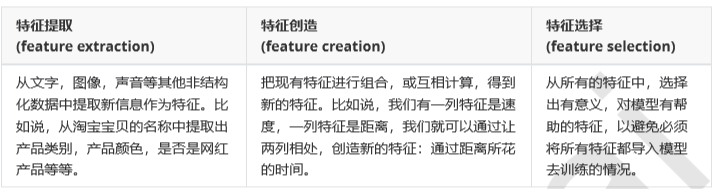

In [3]:
import pandas as pd
data = pd.read_csv('digit recognizor.csv')


In [4]:
X = data.iloc[:,1:]
y = data.iloc[:,0]

X.shape
y.shape

(42000, 784)

(42000,)

## 过滤法 Filter

### 方差过滤

过滤法的主要对象是：需要遍历特征或升维的算法们，而过滤法的主要目的是：在维持算法表现的前提下，帮 助算法们降低计算成本

最近邻算法KNN，单棵决策树，支持向量机SVM，神经网络，回归算法
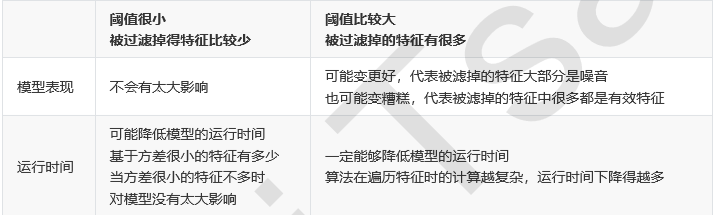
现实中,我们只会使用阈 值为0或者阈值很小的方差过滤，来为我们优先消除一些明显用不到的特征，然后我们会选择更优的特征选择方法 继续削减特征数量。


In [5]:
import numpy as np
from sklearn.feature_selection import VarianceThreshold
#不填参数threshold，默认方差为0（所有记录都相同的特征）
selector = VarianceThreshold()
X_var0 = selector.fit_transform(X)
X_var0.shape

(42000, 708)

In [6]:
#假设只需要708的一半作为特征，我们需要获取所有特征方差的中位数，并以此为threshold

X_fsvar = VarianceThreshold(np.median(X.var().values)).fit_transform(X)
#X.var().values
#np.median(X.var().values)# 1352.2867031801309
X_fsvar.shape # (42000, 392)

(42000, 392)

In [7]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_val_score
import numpy as np

X = data.iloc[:,1:]
y = data.iloc[:,0]


X_fsvar = VarianceThreshold(np.median(X.var().values)).fit_transform(X)


In [ ]:
#cross_val_score(KNN(),X,y,cv=5).mean()
#cross_val_score(RFC(),X,y,cv=5).mean()


In [ ]:
cross_val_score(KNN(),X_fsvar,y,cv=5).mean()

In [ ]:
cross_val_score(RFC(n_estimators=100,random_state=0),X_fsvar,y,cv=5).mean()

### 相关性过滤
我们希望选出与标签相关且有意义的特征，因为这样的特征能够为我们提供大量信息。

在sklearn当中，我们有三种常用的方法来评判特征与标签之间的相关性：卡方，F检验，互信息。 

#### 卡方过滤
卡方过滤是专门针对离散型标签（即分类问题）的相关性过滤。

卡方检验类feature_selection.chi2计算每个非负 特征和标签之间的卡方统计量，并依照卡方统计量由高到低为特征排名。

再结合feature_selection.SelectKBest 这个可以输入”评分标准“来选出前K个分数最高的特征的类，我们可以借此除去最可能独立于标签，与我们分类目 的无关的特征。


In [8]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_fschi = SelectKBest(chi2,k=300).fit_transform(X_fsvar,y)
X_fschi.shape

(42000, 300)

In [ ]:
cross_val_score(RFC(n_estimators=100,random_state=0),X_fschi,y,cv=5).mean()
#分数降低，表示过滤掉的特征中包含有效的相关特征，所以此次过滤不可取
#假如分数提升，则表示过滤掉的是噪声特征

ValueError: x and y must have same first dimension, but have shapes (15,) and (19,)

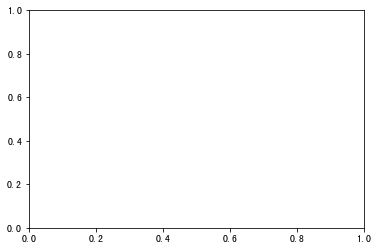

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

score = []
for i in range(390,200,-10):
    X_fschi = SelectKBest(chi2,k=i).fit_transform(X_fsvar,y)
    sc = cross_val_score(RFC(n_estimators=100,random_state=0),X_fschi,y,cv=5).mean()
    score.append(sc)
plt.plot(range(390,200,-10),score)
plt.show()

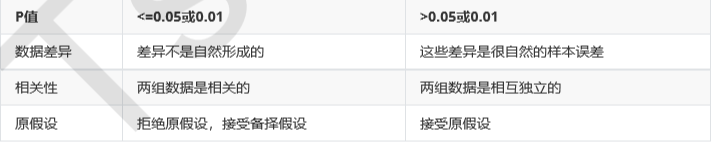

In [11]:
chivalue ,pvalues_chi = chi2(X_fsvar,y)

chivalue

pvalues_chi

k = chivalue.shape[0] - (pvalues_chi>0.05).sum()

k

array([ 945664.84392643, 1244766.05139164, 1554872.30384525,
       1834161.78305343, 1903618.94085294, 1845226.62427198,
       1602117.23307537,  708535.17489837,  974050.20513718,
       1188092.19961931, 1319151.43467036, 1397847.8836796 ,
       1433554.26798015, 1429043.15373433, 1332663.17213405,
       1101423.25372261,  809989.56940485,  519266.71772284,
        285681.88297156,  191589.23696468,  902883.1255264 ,
       1237265.16042373, 1503477.73699155, 1625807.41495542,
       1630206.90922916, 1630597.02883804, 1633456.72909664,
       1610816.75571229, 1483382.49543886, 1256290.1574794 ,
        951236.1617682 ,  693192.66191748,  532386.96220361,
        504617.38933715,  575090.36046243,  501025.03733245,
        802341.10683194, 1078344.8724406 , 1226540.98318702,
       1269945.07968831, 1221758.57688808, 1146535.17810241,
       1080657.20185303, 1079065.30979135, 1092222.70610032,
       1064908.45385716, 1023327.00231067,  974163.15420165,
        918857.12860617,

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

392

#### F检验
F检验，又称ANOVA，方差齐性检验，是用来捕捉每个特征与标签之间的线性关系的过滤方法。

F检验的本质是寻找两组数据之间的线性关系，其原假设是”数据不存在显著的线性关系“。它返回F值和p值两个统 计量。和卡方过滤一样，我们希望选取p值小于0.05或0.01的特征，这些特征与标签时显著线性相关的，而p值大于 0.05或0.01的特征则被我们认为是和标签没有显著线性关系的特征，应该被删除。

In [12]:
from sklearn.feature_selection import f_classif
F, pvalues_f = f_classif(X_fsvar,y)
F
pvalues_f

k = F.shape[0] - (pvalues_f>0.05).sum()

array([ 618.65383492,  846.18897012, 1115.40617051, 1362.3677305 ,
       1452.03355369, 1381.09095571, 1138.26505266,  464.29616121,
        660.00977785,  849.66393412, 1004.7450309 , 1124.76177588,
       1200.99190762, 1209.29489877, 1110.4944286 ,  854.66183292,
        577.52063451,  342.09729054,  178.67397866,  118.01145533,
        612.12261014,  899.40904291, 1196.17528948, 1424.49864852,
       1569.26556677, 1742.49910702, 1910.98023795, 1969.20520223,
       1731.37475948, 1295.09668012,  839.15325001,  531.97951763,
        371.82392681,  336.00820537,  378.93378743,  317.47025479,
        528.94881012,  766.40792176,  947.63168717, 1086.0472161 ,
       1177.72017709, 1253.79641973, 1344.06961068, 1507.33781169,
       1616.50454434, 1512.25864876, 1289.65180587, 1051.26276412,
        839.48869386,  680.07426932,  600.85538567,  633.55772663,
        683.96908509,  347.65867784,  452.76238211,  509.16387684,
        515.7498157 ,  532.86107778,  594.62512658,  664.18740

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 4.71193533e-220,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0

#### 互信息法
互信息法不返回p值或F值类似的统计量，它返回“每个特征与目标之间的互信息量的估计”，这个估计量在[0,1]之间 取值，为0则表示两个变量独立，为1则表示两个变量完全相关。

In [14]:
from sklearn.feature_selection import mutual_info_classif as MIC
result = MIC(X_fsvar,y)
k = result[0] - sum(result<=0)
k

0.07011124065360619

#### 过滤法总结
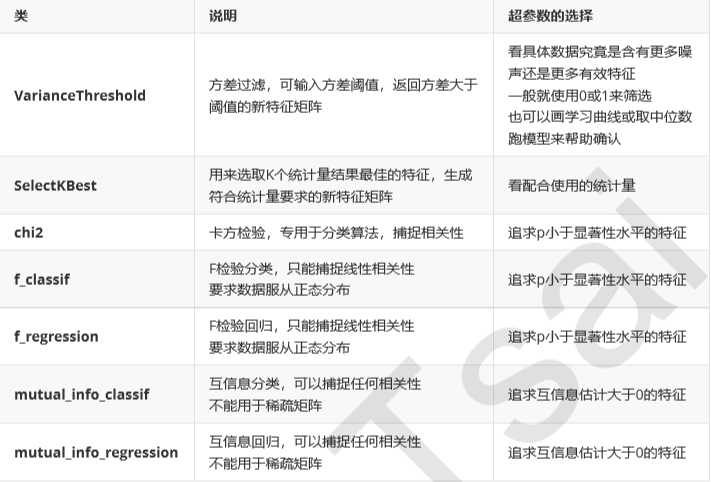


### Embedded 嵌入法
嵌入法是一种让算法自己决定使用哪些特征的方法，即特征选择和算法训练同时进行

In [ ]:
class sklearn.feature_selection.SelectFromModel (estimator, 
                                                 threshold=None, 
                                                 preﬁt=False, 
                                                 norm_order=1, 
                                                 max_features=None) 

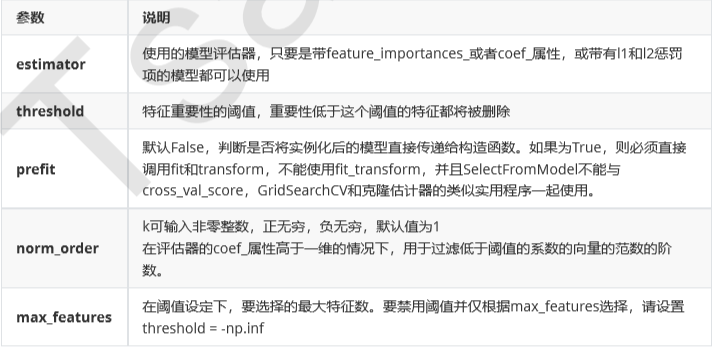

In [17]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as RFC

rfc_ = RFC(n_estimators=100,random_state=10)
X_embd = SelectFromModel(rfc_,threshold=0.005).fit_transform(X,y)
X_embd.shape
cross_val_score(rfc_,X_embd,y,cv=5).mean()

(42000, 38)

0.8897630481182072

In [19]:
#画学习曲线选最佳threshold
fil = rfc_.fit(X,y).feature_importances_

In [ ]:
thresholds = np.linspace(0,fil.max(),20)

score = []
for i in thresholds:
    X_embd = SelectFromModel(rfc_,threshold=i).fit_transform(X,y)
    sc = cross_val_score(rfc_,X_embd,y,cv=5).mean()
    score.append(sc)
plt.plot(thresholds,score)
plt.show()

In [20]:
X_embd = SelectFromModel(rfc_,threshold=0.00067).fit_transform(X,y)
X_embd.shape

cross_val_score(rfc_,X_embd,y,cv=5).mean()

(42000, 331)

0.963809497852296

### 包装法
我们往往使用一个目标函数作为黑盒来帮 助我们选取特征，而不是自己输入某个评估指标或统计量的阈值。

然后，从当前的一组特征中修剪最不重要的 特征。在修剪的集合上递归地重复该过程，直到最终到达所需数量的要选择的特征。区别于过滤法和嵌入法的一次 训练解决所有问题，包装法要使用特征子集进行多次训练，因此它所需要的计算成本是最高的。

最典型的目标函数是递归特征消除法（Recursive feature elimination, 简写为RFE）。它是一种贪婪的优化算法， 旨在找到性能最佳的特征子集。 

包装法的效果是所有特征选择方法中最利于提升模型 表现的，它可以使用很少的特征达到很优秀的效果。除此之外，在特征数目相同时，包装法和嵌入法的效果能够匹 敌，不过它比嵌入法算得更见缓慢，所以也不适用于太大型的数据。相比之下，包装法是最能保证模型效果的特征 选择方法。


In [ ]:
class sklearn.feature_selection.RFE (estimator, 
                                     n_features_to_select=None, 
                                     step=1, 
                                     verbose=0)

In [22]:
from sklearn.feature_selection import RFE
rfc_
selector = RFE(rfc_,n_features_to_select=340,step=50).fit(X,y)
selector.ranking_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

array([10,  9,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        7,  7,  7,  7,  7,  8,  7,  6,  7,  6,  7,  7,  7,  7,  7,  8,  8,
        7,  9,  9,  9,  9,  9,  9,  9,  9,  8,  8,  7,  7,  6,  5,  4,  4,
        3,  3,  4,  3,  4,  4,  4,  5,  5,  6,  6,  7,  7,  9,  9,  9, 10,
       10, 10,  9,  8,  6,  6,  5,  4,  4,  2,  2,  1,  1,  1,  1,  1,  1,
        1,  2,  3,  3,  4,  6,  5,  7, 10, 10, 10, 10, 10,  7,  7,  5,  5,
        4,  3,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  3,  4,  4,
        5,  6,  7, 10, 10, 10,  9,  7,  5,  5,  4,  3,  2,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  3,  4,  6,  7, 10, 10, 10,
       10,  7,  5,  4,  3,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  2,  5,  6, 10, 10, 10,  7,  5,  4,  3,  2,  2,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        4,  6,  7,  8,  9

In [23]:
X_wrapper = selector.transform(X)
cross_val_score(rfc_,X_wrapper,y,cv=5).mean()

0.9632383639568669